In [1]:
%load_ext autoreload

In [2]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('../../analysis')))
from xa.proc.exp import Experiment

x = Experiment(
    name="Asymmetric Run 15m",
    i1='1',
    i2='2',
    i3='3',
    # ... add more iterations here
)

In [3]:
# iqr cleaning
# NOTE: recompute stats and summary
x.iqrclean(cuT=1.5, muT=1.5, rqlT=1.5, rqtT=1.5, rstT=1.5) # thresholds for defining lower and upper fences

In [4]:
import pandas as pd
import numpy as np

# (un)comment for selecting display precision for floats
pd.options.display.float_format = None # reset
pd.options.display.float_format = np.format_float_positional # dynamic
pd.options.display.float_format = "{:.3f}".format # fixed

# N = number of elements
# numpy.std is biased, divides by N (population), ddof by default is 0
# pandas.std is unbiased, divides by N-1 (sample), ddof by default is 1

x.stats

count   mean  std bias  std unbias    min  \
iter stat                                                                 
i1   cpu usage             3643.000  3.156     3.746       3.746  0.007   
     memory usage          3812.000  0.670     0.646       0.646  0.031   
     request latency        835.000  0.172     0.177       0.177  0.002   
     request throughput     852.000 26.581     6.847       6.851 20.390   
     response time      1407124.000  3.946     6.626       6.626  0.000   
i2   cpu usage             2868.000  3.779     4.446       4.447  0.007   
     memory usage          2862.000  0.654     0.646       0.646  0.031   
     request latency        832.000  0.017     0.012       0.012  0.002   
     request throughput     850.000 34.359     4.909       4.912 24.833   
     response time       607950.000  0.001     0.001       0.001  0.000   
i3   cpu usage             3670.000  3.121     3.696       3.696  0.007   
     memory usage          3830.000  0.671     0.644       0.644  0.031   
     request latency        835.000  0.175     0.180       0.180  0.002   
     request throughput     852.000 26.500     6.904       6.908 20.416   
     response time      1409496.000  4.003     6.657       6.657  0.000   

                           25%    50%    75%    max  ci 95% -  ci 95% +  \
iter stat                                                                 
i1   cpu usage           0.506  1.064  5.603 15.212     3.035     3.278   
     memory usage        0.182  0.371  1.097  2.469     0.650     0.691   
     request latency     0.005  0.169  0.306  0.718     0.160     0.184   
     request throughput 21.386 21.856 32.876 49.901    26.121    27.041   
     response time       0.000  0.000 15.099 30.000     3.935     3.957   
i2   cpu usage           0.539  1.278  6.841 16.856     3.616     3.942   
     memory usage        0.156  0.364  1.094  2.518     0.630     0.677   
     request latency     0.005  0.026  0.027  0.047     0.016     0.018   
     request throughput 30.608 32.980 37.988 49.921    34.029    34.689   
     response time       0.000  0.000  0.000  0.010     0.001     0.001   
i3   cpu usage           0.453  1.032  5.586 15.030     3.001     3.240   
     memory usage        0.180  0.356  1.141  2.584     0.651     0.692   
     request latency     0.005  0.172  0.314  0.722     0.163     0.188   
     request throughput 21.256 21.725 32.859 49.929    26.036    26.964   
     response time       0.000  0.000 15.100 30.000     3.993     4.014   

                         ci 99% -  ci 99% +  
iter stat                                    
i1   cpu usage              2.997     3.316  
     memory usage           0.643     0.697  
     request latency        0.157     0.188  
     request throughput    25.976    27.185  
     response time          3.932     3.960  
i2   cpu usage              3.565     3.993  
     memory usage           0.623     0.685  
     request latency        0.016     0.018  
     request throughput    33.925    34.793  
     response time          0.001     0.001  
i3   cpu usage              2.964     3.278  
     memory usage           0.644     0.698  
     request latency        0.159     0.191  
     request throughput    25.890    27.109  
     response time          3.989     4.018

In [5]:
x.summary

,mean of means,std of means bias,std of means unbias
cpu usage,3.352,0.302,0.370
response time,2.650,1.874,2.295
memory usage,0.665,0.008,0.010
request throughput,29.146,3.686,4.514
request latency,0.122,0.074,0.091


In [6]:
%autoreload 2
from xa.draw.plot import Figure, Pairwise

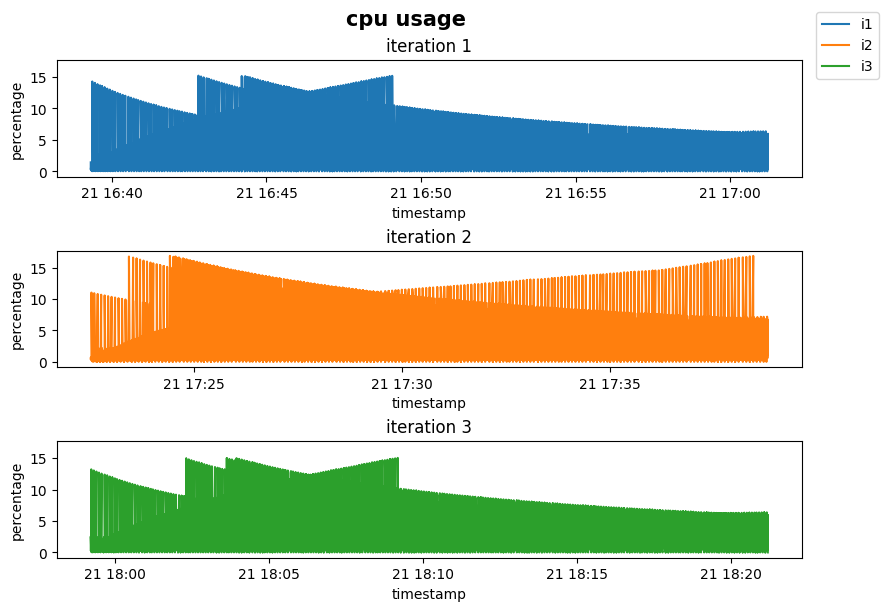

In [7]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.cpu.usage.TS, y=x.i1.metric.cpu.usage.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i2.metric.cpu.usage.TS, y=x.i2.metric.cpu.usage.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i3.metric.cpu.usage.TS, y=x.i3.metric.cpu.usage.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='percentage'),
    title='cpu usage', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

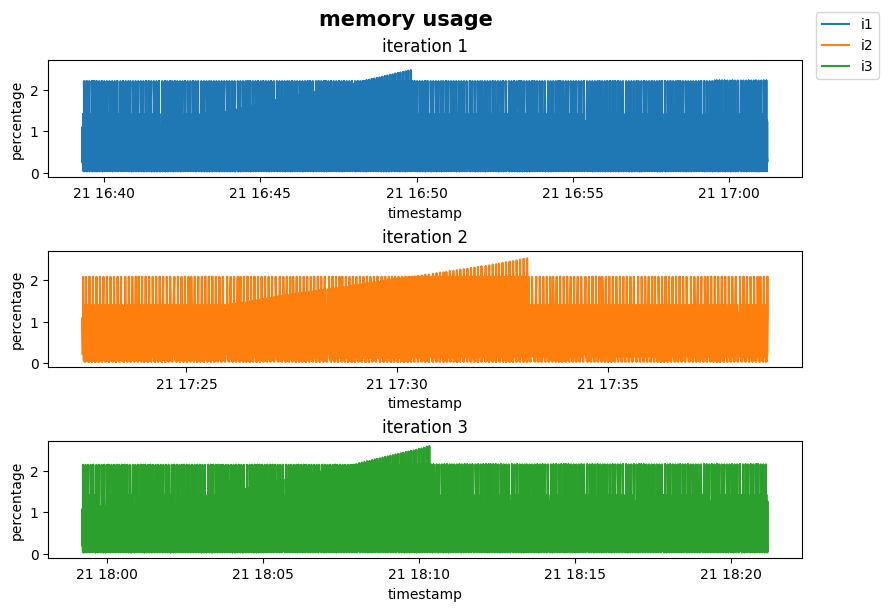

In [8]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.memory.usage.TS, y=x.i1.metric.memory.usage.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i2.metric.memory.usage.TS, y=x.i2.metric.memory.usage.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i3.metric.memory.usage.TS, y=x.i3.metric.memory.usage.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='percentage'),
    title='memory usage', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

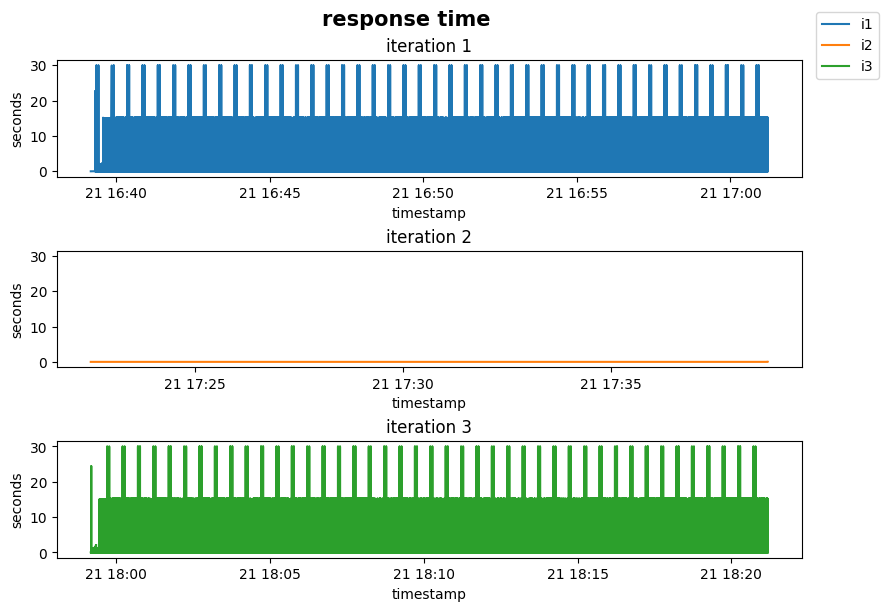

In [9]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.response.time.TS, y=x.i1.metric.response.time.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i2.metric.response.time.TS, y=x.i2.metric.response.time.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i3.metric.response.time.TS, y=x.i3.metric.response.time.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='seconds'),
    title='response time', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

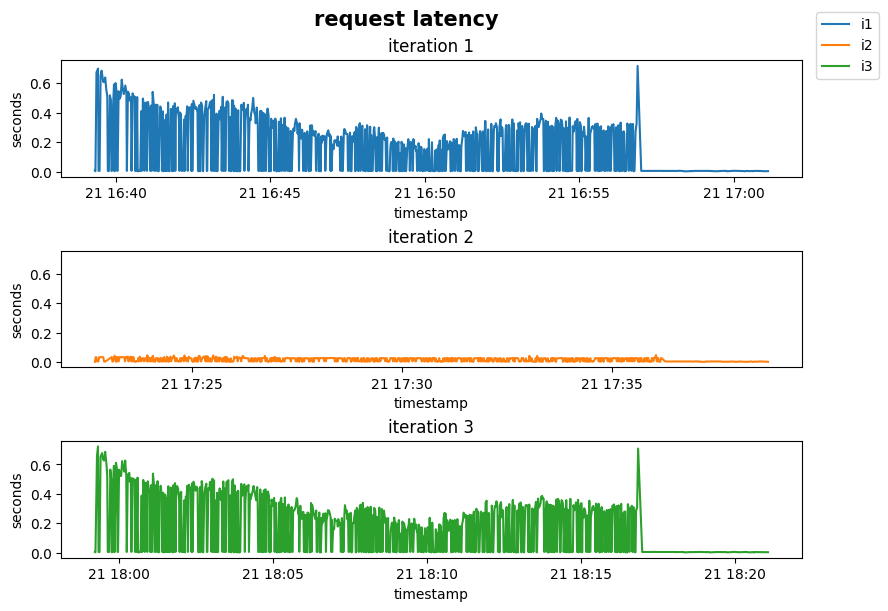

In [10]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.request.latency.TS, y=x.i1.metric.request.latency.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i2.metric.request.latency.TS, y=x.i2.metric.request.latency.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i3.metric.request.latency.TS, y=x.i3.metric.request.latency.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='seconds'),
    title='request latency', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

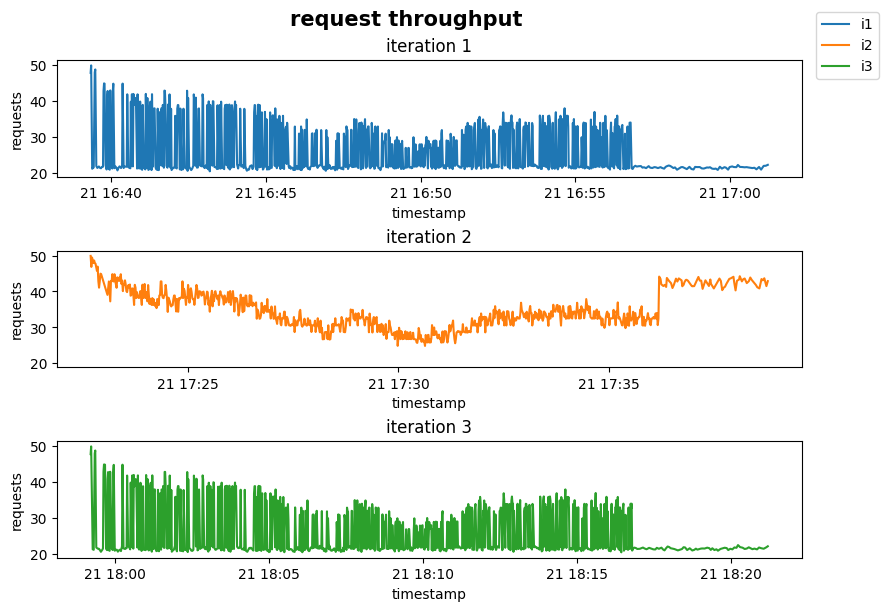

In [11]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.request.throughput.TS, y=x.i1.metric.request.throughput.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='requests'),
    Pairwise(x=x.i2.metric.request.throughput.TS, y=x.i2.metric.request.throughput.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='requests'),
    Pairwise(x=x.i3.metric.request.throughput.TS, y=x.i3.metric.request.throughput.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='requests'),
    title='request throughput', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig